
Population counts:


,disease:,no_disease:,total:
exposed:,49,61,110
nonexposed:,567,1368,1935
total:,616,1429,2045




True Population Relative Risk: 1.52020202020202



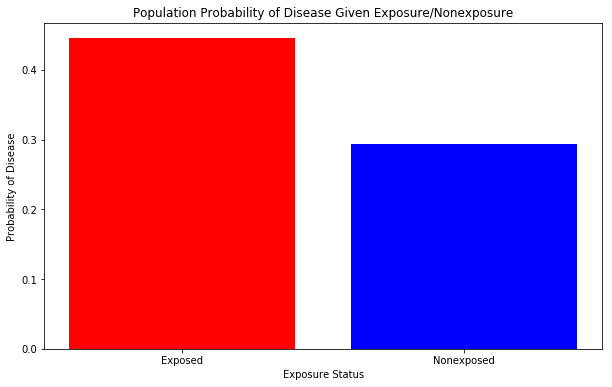

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample size,relative_risk,log_relative_risk,var_log_relative_risk,ub_ci_log_rr,lb_ci_log_rr,weight
study number:,,,,,,,,,,,
0,1,2,13,56,72,1.769231,0.570545,0.729097,2.244134,-1.103044,1.37156
1,11,11,103,249,374,1.708738,0.535755,0.0523224,0.984087,0.087423,19.1123
2,5,5,47,156,213,2.159574,0.769911,0.11635,1.438471,0.101352,8.59472
3,5,7,89,216,317,1.427903,0.356207,0.124624,1.048128,-0.335715,8.02414
4,9,21,142,402,574,1.149296,0.139149,0.0829818,0.703758,-0.425459,12.0508
5,4,6,72,158,240,1.277778,0.245122,0.159541,1.027997,-0.537752,6.26798
6,8,12,113,264,397,1.334513,0.288567,0.081197,0.847070,-0.269937,12.3157
7,3,2,20,66,91,2.580000,0.947789,0.171705,1.759962,0.135617,5.82393
8,14,27,196,452,689,1.128920,0.121261,0.0505972,0.562140,-0.319617,19.764


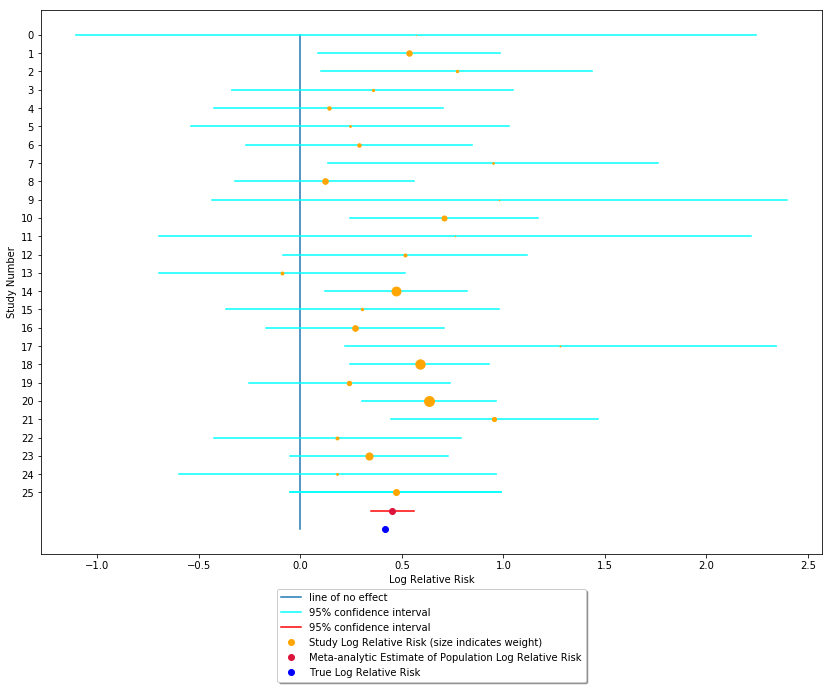

Z statistic of summary effect estimate =  8.529809817812671
p <  0.001


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# simulating a population of individuals, with a certain proportion exposed to a hazard. The probability of an individual
# having a certain disease status changes conditionally on their exposure status.

population = np.array([])

population_size = np.random.randint(1000,10000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)


for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))
  

# creating counts for exposure and disease status, in the population

population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no_disease:', 'total:'])

df_pop.loc['exposed:', 'disease:'] = exposed_disease
df_pop.loc['exposed:', 'no_disease:'] = exposed_no_disease
df_pop.loc['exposed:', 'total:']  = exposed_disease + exposed_no_disease
df_pop.loc['nonexposed:', 'disease:']= nonexposed_disease
df_pop.loc['nonexposed:', 'no_disease:'] = nonexposed_no_disease
df_pop.loc['nonexposed:', 'total:'] = nonexposed_disease + nonexposed_no_disease
df_pop.loc['total:', 'disease:'] = exposed_disease + nonexposed_disease
df_pop.loc['total:', 'no_disease:'] = exposed_no_disease + nonexposed_no_disease 
df_pop.loc['total:', 'total:'] = population_n

# correcting 0 counts so that the relative risk is defined
if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,0] == 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[0,0] == 0.5

print('\nPopulation counts:')
display(df_pop)
print()

# calculating the population effect size

prob_disease_giv_exposure = exposed_disease/(exposed_no_disease + exposed_disease)

prob_disease_giv_nonexposure = nonexposed_disease/(nonexposed_no_disease + nonexposed_disease)

true_relative_risk = prob_disease_giv_exposure/prob_disease_giv_nonexposure

true_log_relative_risk = np.log(true_relative_risk)

    
print()
print('True Population Relative Risk:', true_relative_risk)
print()


plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [prob_disease_giv_exposure, prob_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Probability of Disease')
plt.title('Population Probability of Disease Given Exposure/Nonexposure')
plt.show()


# simulating studies for a meta-analysis

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    # correcting 0 counts so that the relative risk is defined
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
  

df['sample size'] = df['exposed_disease'] + df['exposed_no_disease'] + df['nonexposed_disease'] + df['nonexposed_no_disease']
    
df.index.name = 'study number:'



# calculating the relative risk for each study

df['relative_risk'] = (df['exposed_disease']/(df['exposed_no_disease'] + df['exposed_disease']))/(df['nonexposed_disease']/(df['nonexposed_no_disease'] + df['nonexposed_disease']))
df['relative_risk'] = df['relative_risk'].astype('float')
 
# calculating the log relative risk for each study

df['log_relative_risk'] = np.log(df['relative_risk'])

    
# calculating standard error and confidence intervals for the log relative risk

SE_log_relative_risk = np.array([])
var_log_relative_risk = np.array([])



n1 = df['exposed_disease'] + df['exposed_no_disease']
n2 = df['nonexposed_disease'] + df['nonexposed_no_disease']
var_log_relative_risk = 1/df['exposed_disease'] - 1/n1 + 1/df['nonexposed_disease'] - 1/n2                      
se_log_relative_risk = np.sqrt(var_log_relative_risk.astype('float'))


df['var_log_relative_risk'] = var_log_relative_risk 
df['ub_ci_log_rr'] = df['log_relative_risk'] + 1.96 * se_log_relative_risk
df['lb_ci_log_rr'] = df['log_relative_risk'] - 1.96 * se_log_relative_risk
df['weight'] = 1/var_log_relative_risk

    
display(df)


# creating a forest plot of relative risks for each study

y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)

study_list = list(df.index)


plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Relative Risk')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()


for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_rr'].iloc[i],df['ub_ci_log_rr'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
 
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
    

stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    

for i in np.arange(len(df)):
    plt.plot(df['log_relative_risk'].iloc[i], i, 'o', color = 'orange', markersize = stndrd_weights[i])
    
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_relative_risk']
weights = df['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

# calculating and plotting the confidence intervals of the summary estimate
ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_relative_risk'][len(df['log_relative_risk'])-1], len(df['log_relative_risk'])-1, 'o', color = 'orange', label = 'Study Log Relative Risk (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Relative Risk')

plt.plot(true_log_relative_risk,max(df.index)+2, 'o', color = 'blue', label = 'True Log Relative Risk')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()

    
# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)